In [107]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [108]:
df_teams=pd.read_csv('final_data2.csv')

df_teams = df_teams[df_teams['year'] != 1]
#df_teams.drop(columns=['tmID'], inplace=True)
df_teams.head()


,o_ftm,o_fta,o_oreb,o_to,o_pts,d_ftm,d_3pm,d_oreb,d_stl,d_blk,...,PostSteals,PostfgMade,PostftAttempted,PostDQ,award_count,post_losses,W,L,playoff,year
16,431.0,577.0,305.0,496.0,2186.0,533.0,138.0,326.0,259.0,123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
17,426.0,570.0,331.0,538.0,2185.0,455.0,119.0,277.0,305.0,95.0,...,47.0,122.0,87.0,0.0,0.0,3.0,3.0,3.0,1,2
18,519.0,699.0,341.0,530.0,2331.0,480.0,136.0,331.0,284.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
19,521.0,634.0,273.0,440.0,2475.0,370.0,124.0,290.0,233.0,85.0,...,27.0,67.0,33.0,0.0,1.0,0.0,6.0,0.0,1,2
20,428.0,569.0,285.0,518.0,2213.0,503.0,109.0,321.0,267.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


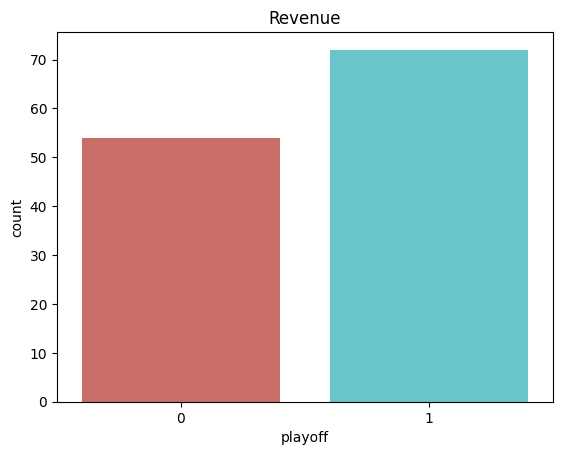

In [109]:
sb.countplot(x='playoff',data=df_teams, palette='hls')
plt.title("Revenue")
plt.show()

In [110]:

def train_evaluate_decision_tree_graph(model, data, target_col="playoff", scaling=False):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    years_tested = []

    # Sort the data by the "year" column
    data = data.sort_values(by="year")

    years = sorted(data["year"].unique())

    for year in years[2:]:
       
        # Split the data into training and test sets
        train_data = data[data["year"] < year ]
        test_data = data[data["year"] == year ]
        if(scaling):
            scaler = MinMaxScaler()
            train_data = scaler.fit_transform(train_data)
            train_data = pd.DataFrame(train_data, columns=data.columns)
            test_data = scaler.transform(test_data)
            test_data = pd.DataFrame(test_data, columns=data.columns)

        X_train = train_data.drop([target_col], axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop([target_col], axis=1)
        y_test = test_data[target_col]
        print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

        # Create and train the decision tree model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        years_tested.append(year)

    return years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores


In [111]:

def train_evaluate_decision_tree(model, data, target_col="playoff", scaling=False):
    # Sort the data by the "year" column
    data = data.sort_values(by="year")
       
    # Define the training and testing split ratios
    train_ratio = 0.7
    train_data_year = int(train_ratio * len(data["year"].unique()))

    train_data = data[data["year"] < train_data_year]
    test_data = data[data["year"] >= train_data_year]
    if(scaling):
        scaler = MinMaxScaler()
        train_data = scaler.fit_transform(train_data)
        train_data = pd.DataFrame(train_data, columns=data.columns)
        test_data = scaler.transform(test_data)
        test_data = pd.DataFrame(test_data, columns=data.columns)

    X_train = train_data.drop(target_col, axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop(target_col, axis=1)
    y_test = test_data[target_col]

    # Create and train the decision tree model
    model.fit(X_train, y_train)
    feature_names = X_train.columns

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [112]:
def plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores):
    # Create a graph to plot accuracy, precision, recall, and f1 over time
    plt.figure(figsize=(20, 5))

    # Plot accuracy
    plt.subplot(1, 4, 1)
    plt.plot(years_tested, accuracy_scores, marker='o')
    plt.title('Accuracy Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Accuracy')

    # Plot precision
    plt.subplot(1, 4, 2)
    plt.plot(years_tested, precision_scores, marker='o', color='orange')
    plt.title('Precision Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Precision')

    # Plot recall
    plt.subplot(1, 4, 3)
    plt.plot(years_tested, recall_scores, marker='o', color='green')
    plt.title('Recall Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Recall')

    # Plot f1
    plt.subplot(1, 4, 4)
    plt.plot(years_tested, f1_scores, marker='o', color='red')
    plt.title('F1 Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('F1')

    plt.tight_layout()
    plt.show()



(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9552238805970149
Precision: 0.9743589743589743
Recall: 0.95
F1: 0.9620253164556962


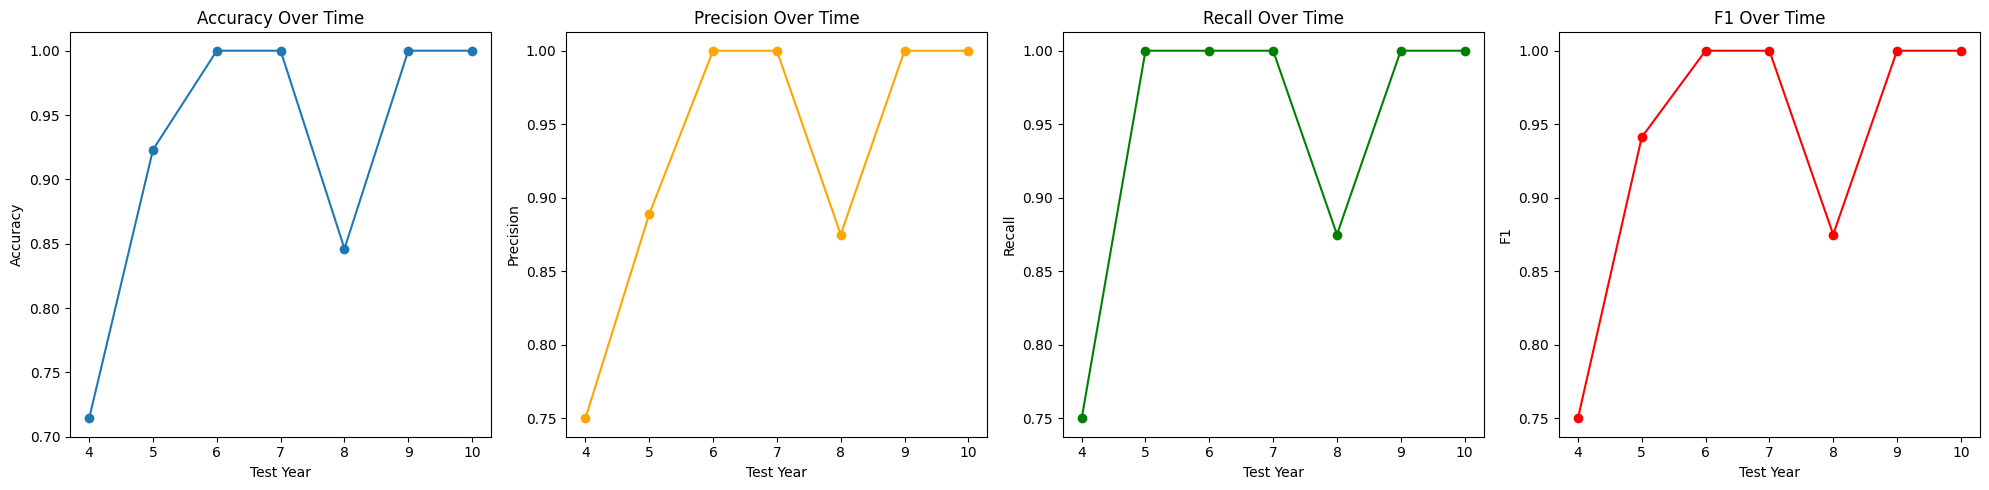

In [113]:
model = DecisionTreeClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9701492537313433
Precision: 1.0
Recall: 0.95
F1: 0.9743589743589743


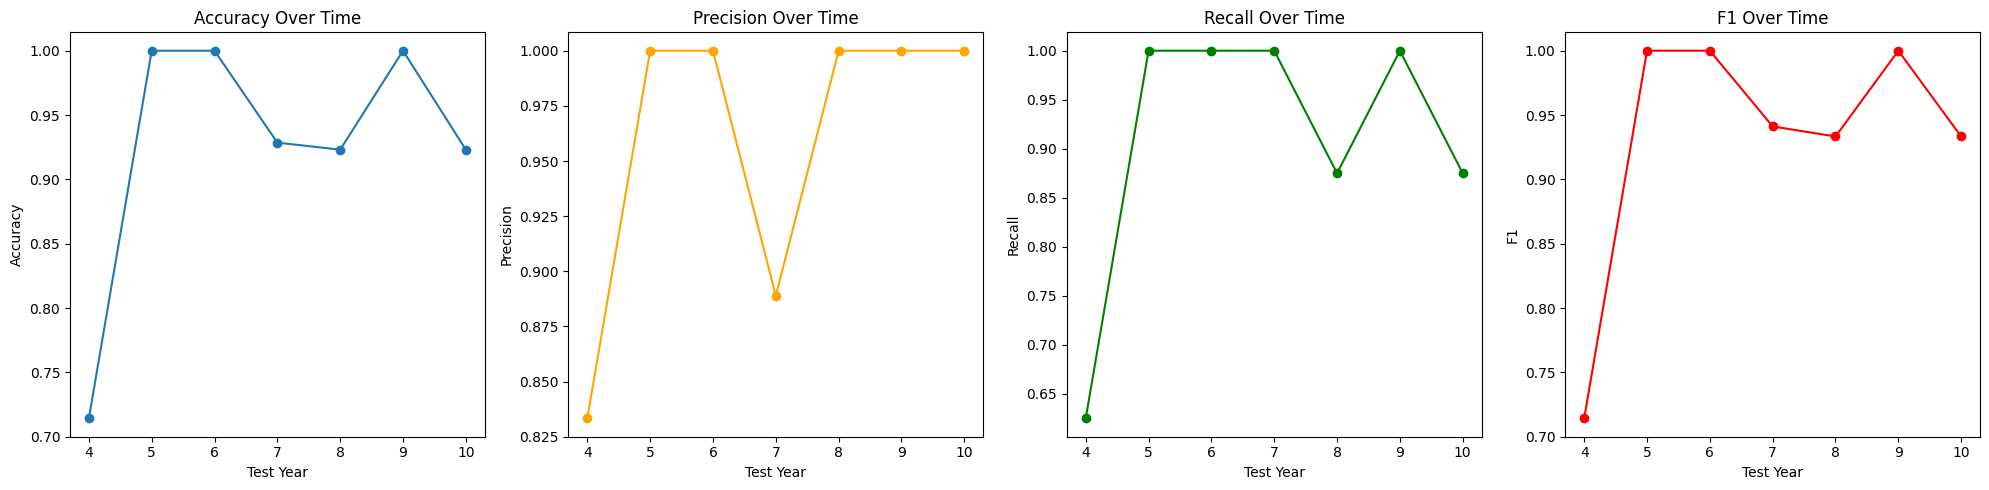

In [114]:
model = RandomForestClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.8955223880597015
Precision: 0.9024390243902439
Recall: 0.925
F1: 0.9135802469135802


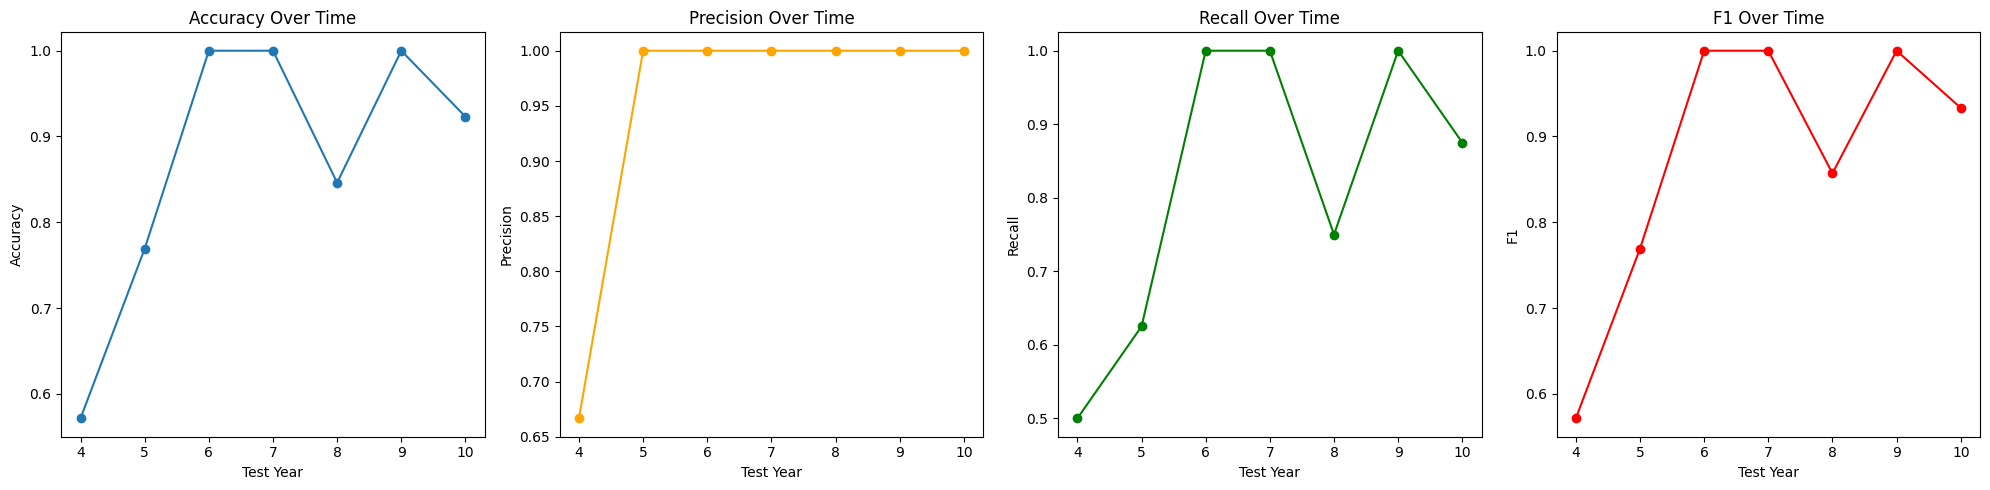

In [115]:
model = KNeighborsClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9253731343283582
Precision: 0.926829268292683
Recall: 0.95
F1: 0.9382716049382716


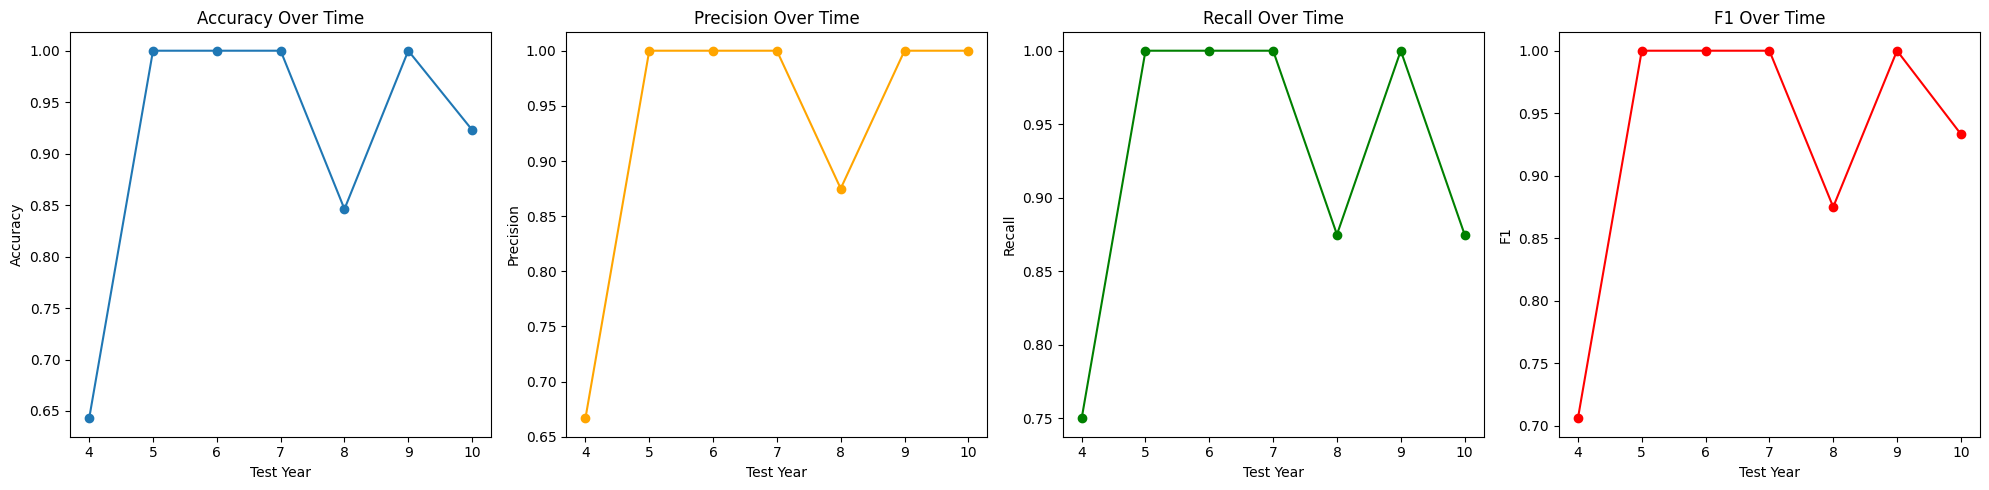

In [116]:
model = XGBClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)


(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9552238805970149
Precision: 0.9743589743589743
Recall: 0.95
F1: 0.9620253164556962


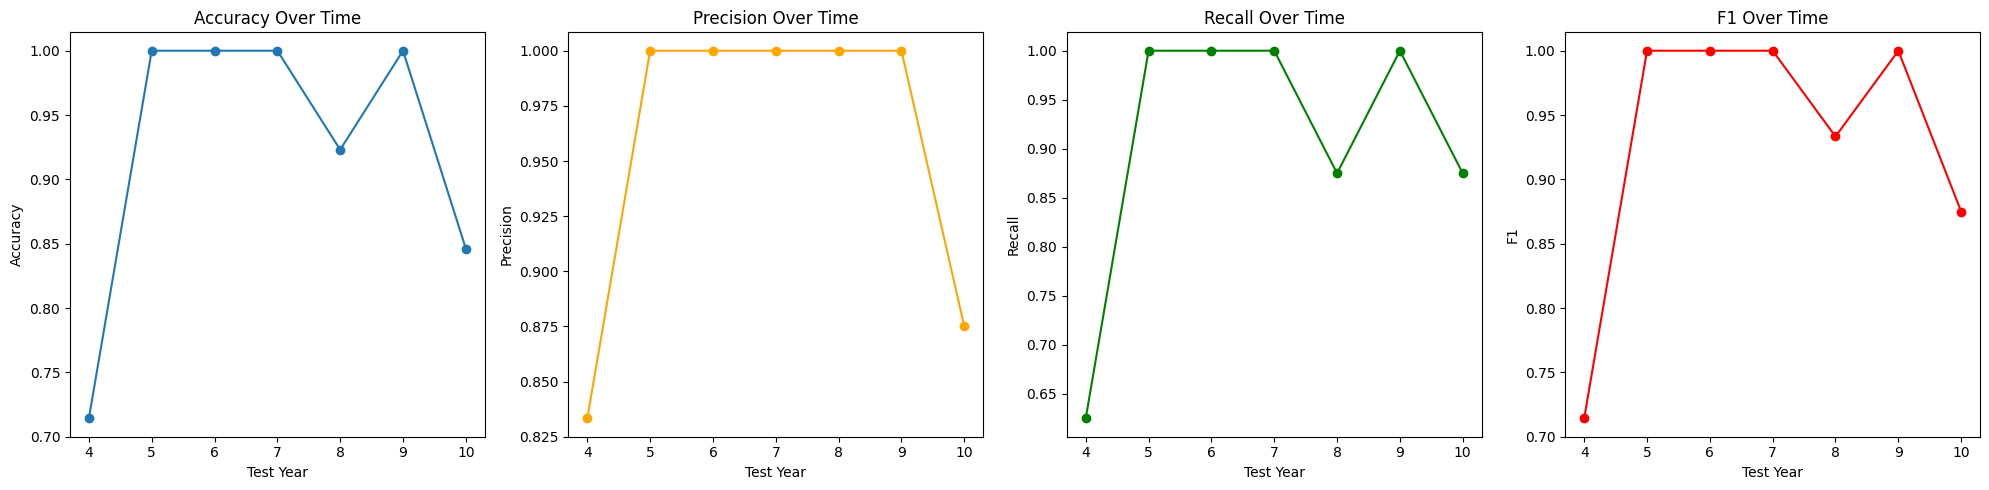

In [117]:
model = GaussianNB()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9104477611940298
Precision: 0.9047619047619048
Recall: 0.95
F1: 0.9268292682926829


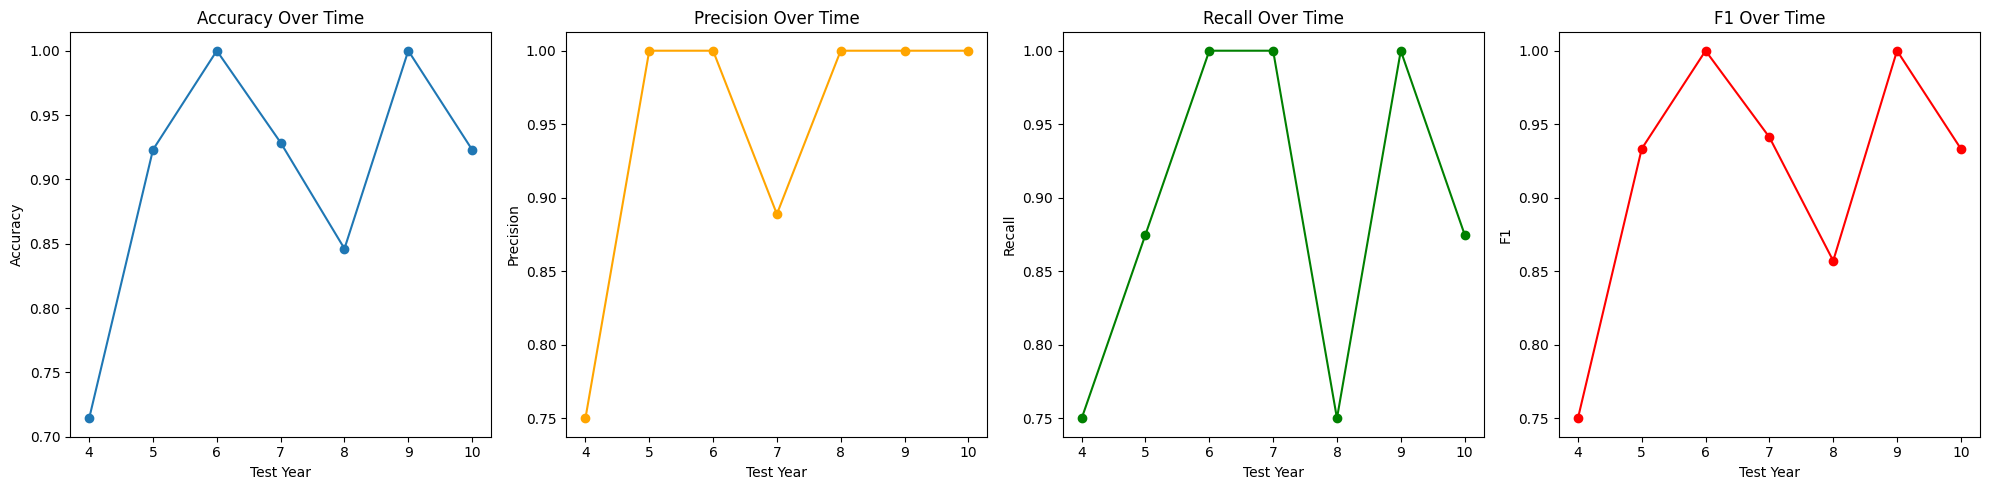

In [118]:
model =SVC()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)
(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)
Accuracy: 0.9701492537313433
Precision: 1.0
Recall: 0.95
F1: 0.9743589743589743


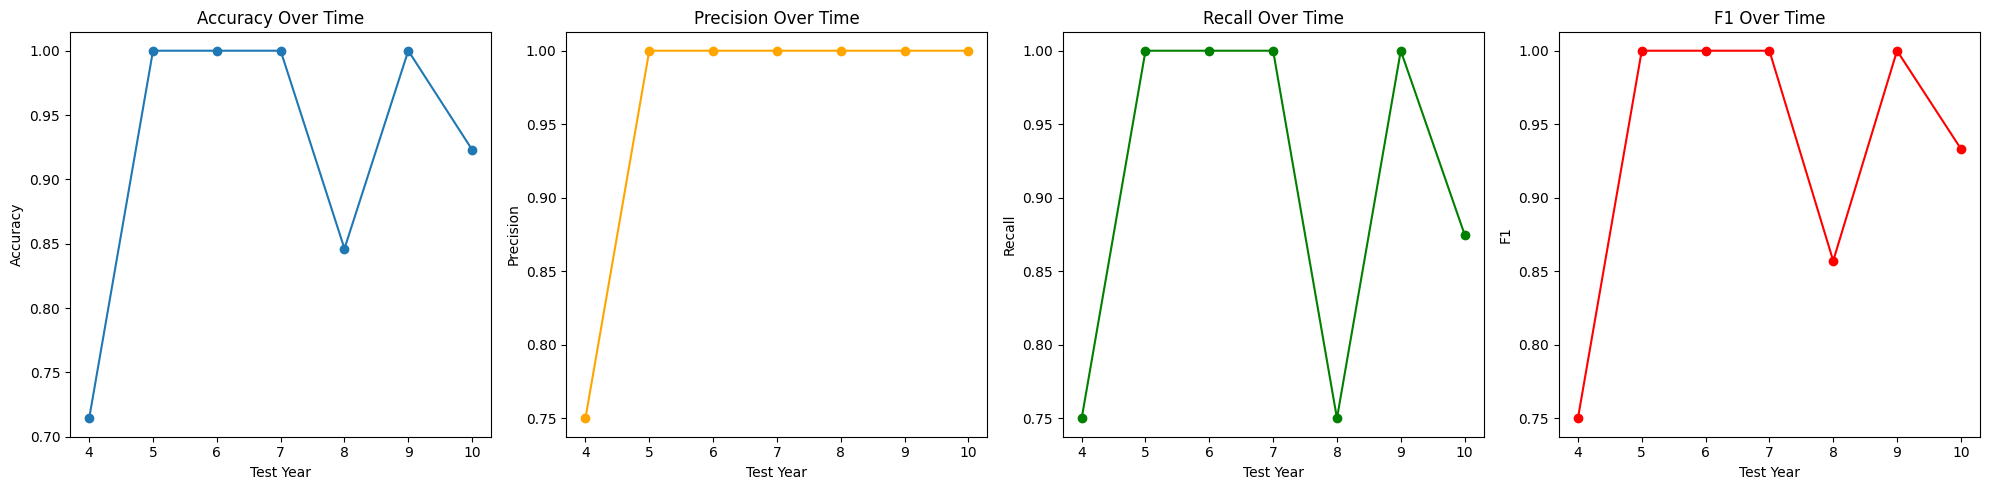

In [119]:
model = LogisticRegression()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 28) (32,) (14, 28) (14,)
(46, 28) (46,) (13, 28) (13,)
(59, 28) (59,) (13, 28) (13,)
(72, 28) (72,) (14, 28) (14,)
(86, 28) (86,) (13, 28) (13,)


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\A

(99, 28) (99,) (14, 28) (14,)
(113, 28) (113,) (13, 28) (13,)


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9701492537313433
Precision: 0.975
Recall: 0.975
F1: 0.975


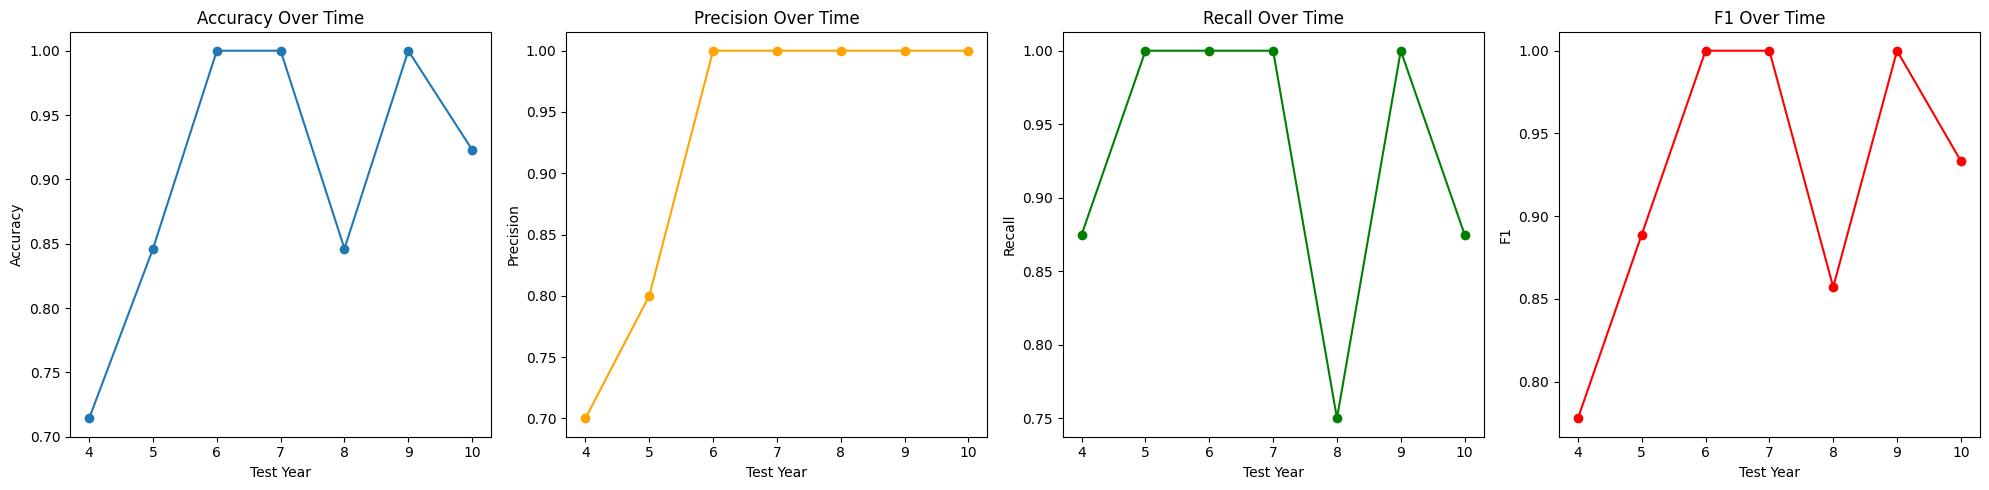

In [120]:
model = MLPClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)